In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")


In [3]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import dtreeviz

import graphviz
import pandas as pd
from sklearn import tree

# Classifier model

In [4]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"
tree_classifier = DecisionTreeClassifier(max_depth=4, random_state=random_state)
tree_classifier.fit(dataset[features], dataset[target])

DecisionTreeClassifier(max_depth=4, random_state=1234)

## Initialize dtreeviz model

In [5]:
viz_model = dtreeviz.model(tree_classifier, x_data=dataset[features], y_data=dataset[target], feature_names=features, 
               target_name=target, class_names=[0, 1])

## Tree visualizations

### Tree structure

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


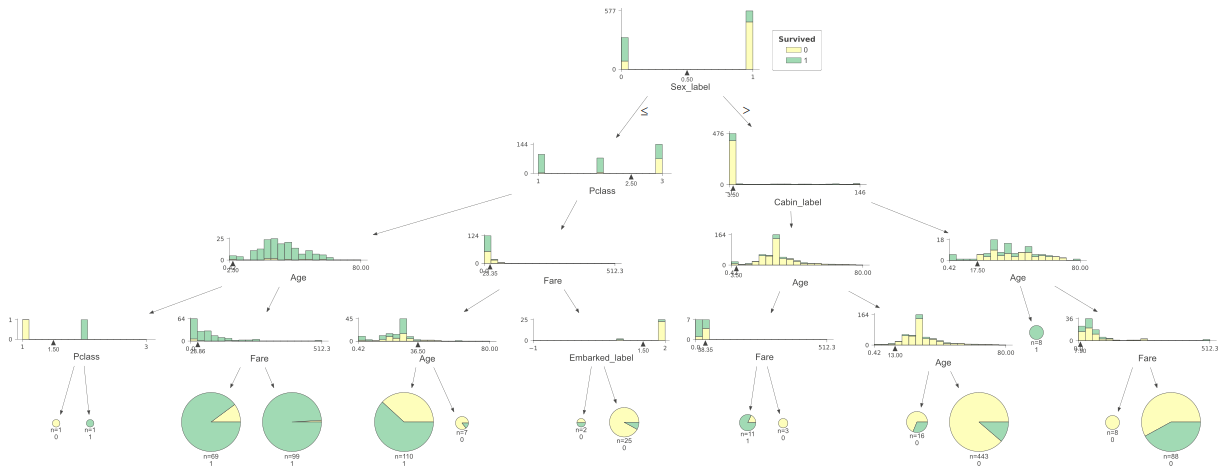

In [6]:
viz_model.view()

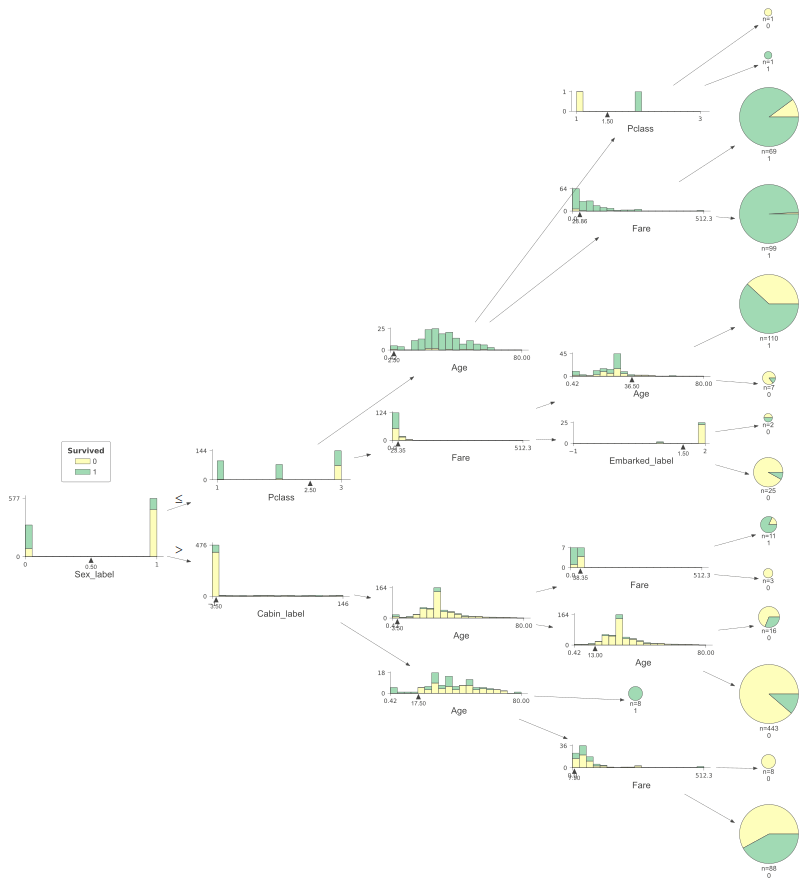

In [7]:
# different tree orientation
viz_model.view(orientation="LR")

### Tree structure simplified

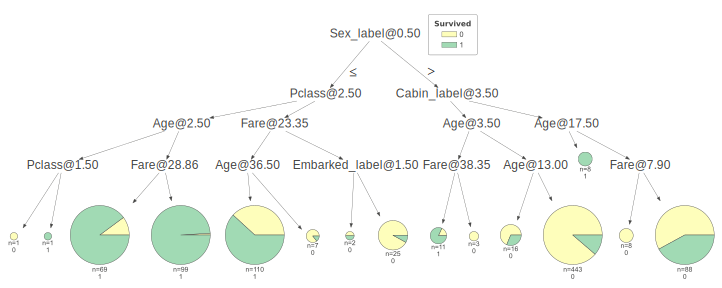

In [8]:
viz_model.view(fancy=False)

### Tree structure levels filtering

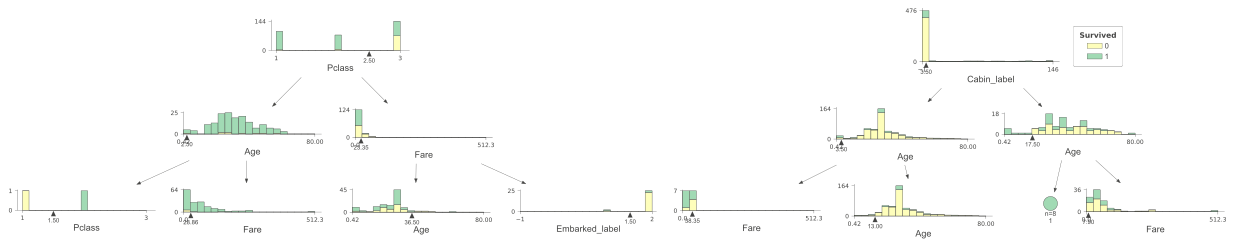

In [9]:
viz_model.view(depth_range_to_display=(1, 3))

## Prediction path explanations

In [16]:
x = dataset[features].iloc[10]
x

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

### Path inside tree structure

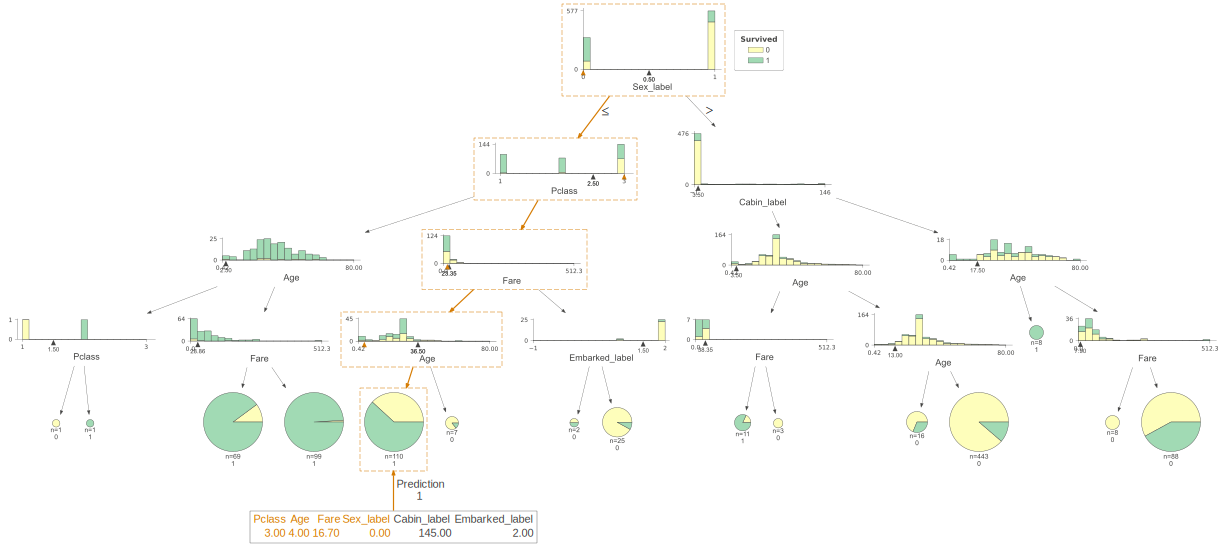

In [18]:
viz_model.view(x=x)

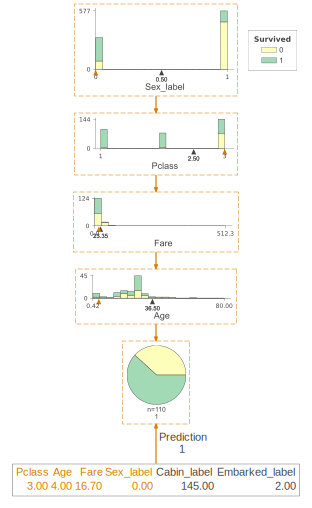

In [19]:
viz_model.view(x=x, show_just_path=True)

### Prediction features range values

In [20]:
print(viz_model.explain_prediction_path(x))

2.5 <= Pclass 
Age < 36.5
Fare < 23.35
Sex_label < 0.5



### Prediction features importance

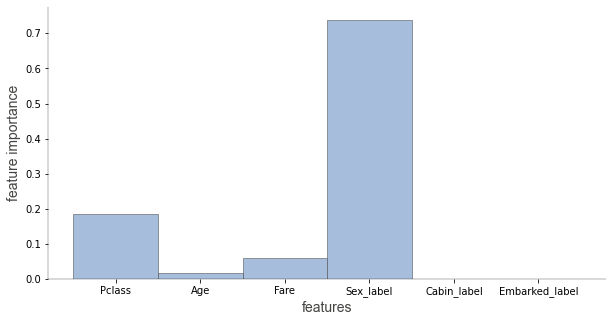

In [22]:
viz_model.instance_feature_importance(x)

## Leaf info

### Leaf sizes

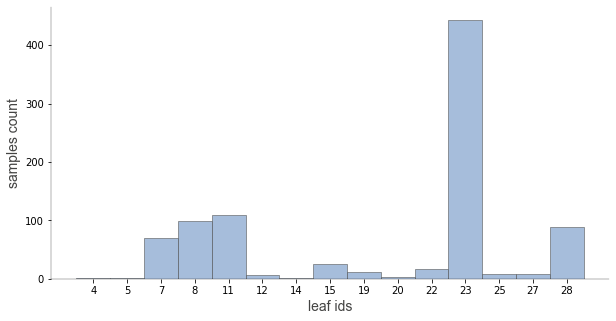

In [23]:
viz_model.leaf_sizes()

### Leaf classes distributions

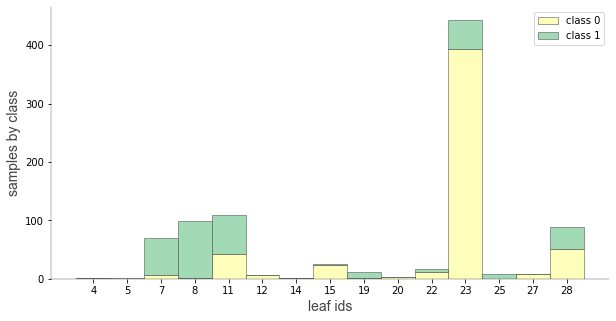

In [24]:
viz_model.ctree_leaf_distributions()

### Leaf/node stats

In [25]:
viz_model.node_stats(node_id=23)

Pclass         Age        Fare  Sex_label  Cabin_label  \
count  443.000000  443.000000  443.000000      443.0   443.000000   
mean     2.647856   30.564784   15.596611        1.0    -0.984199   
std      0.603657   10.211260   18.798236        0.0     0.217396   
min      1.000000   14.000000    0.000000        1.0    -1.000000   
25%      2.000000   24.000000    7.775000        1.0    -1.000000   
50%      3.000000   29.699118    8.050000        1.0    -1.000000   
75%      3.000000   33.000000   15.245800        1.0    -1.000000   
max      3.000000   74.000000  227.525000        1.0     3.000000   

       Embarked_label  
count      443.000000  
mean         1.650113  
std          0.706735  
min          0.000000  
25%          2.000000  
50%          2.000000  
75%          2.000000  
max          2.000000

### Leaf purities

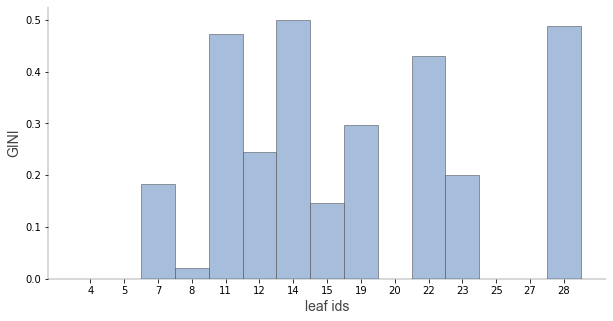

In [26]:
viz_model.leaf_purity()

# Regressor model

In [27]:
random_state = 1234
features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target_reg = "Age"
tree_regressor = DecisionTreeRegressor(max_depth=4, random_state=random_state, criterion="mae")
tree_regressor.fit(dataset[features_reg], dataset[target_reg])


/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.


DecisionTreeRegressor(criterion='mae', max_depth=4, random_state=1234)

## Initialize dtreeviz model

In [28]:
viz_rmodel = dtreeviz.model( model=tree_regressor, 
                        x_data=dataset[features_reg], 
                        y_data=dataset[target_reg], 
                        feature_names=features_reg, 
                        target_name=target_reg)

## Tree visualisations

### Tree structure

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


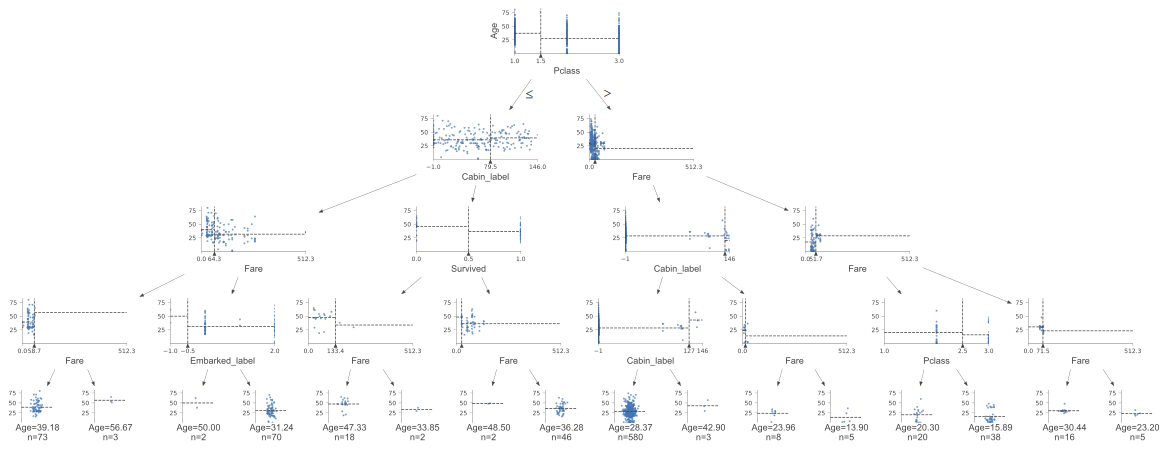

In [29]:
viz_rmodel.view()

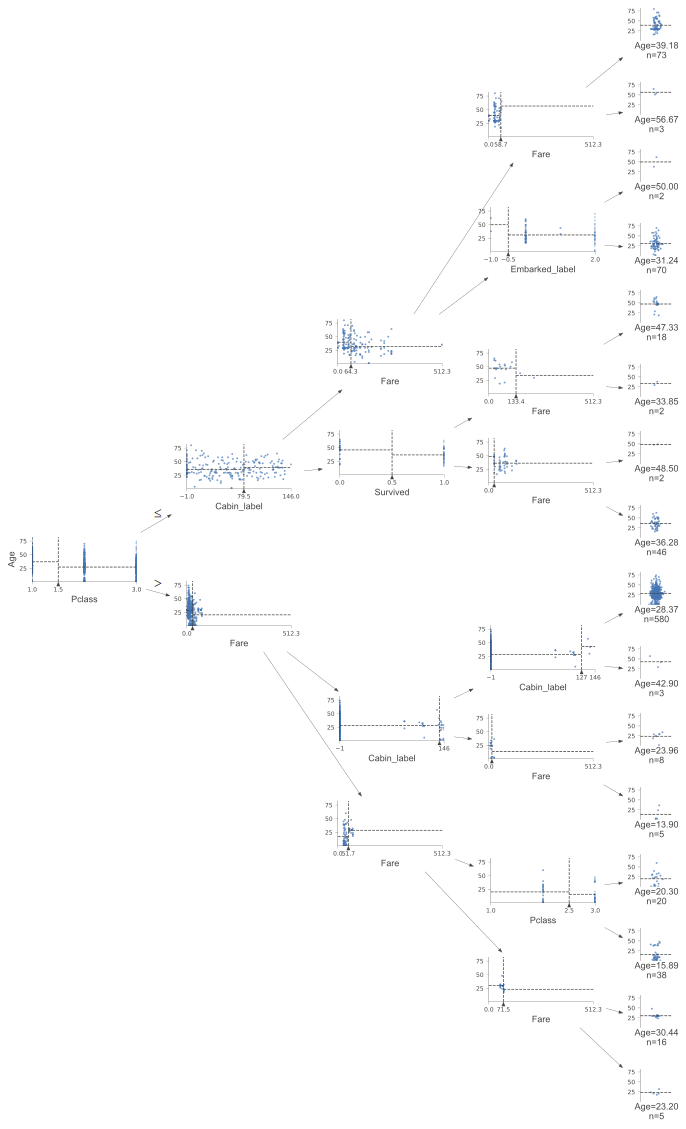

In [30]:
# different tree orientation
viz_rmodel.view(orientation="LR")

### Tree structure simplified

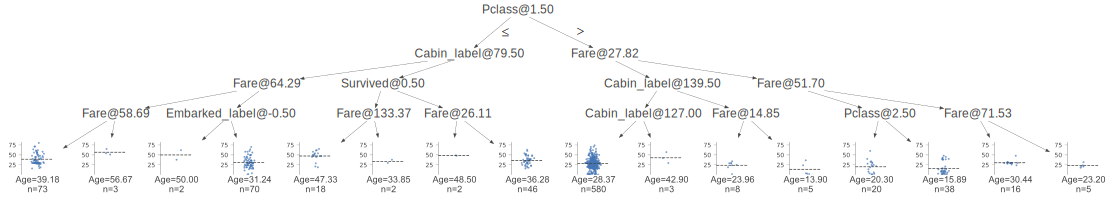

In [31]:
viz_rmodel.view(fancy=False)

### Tree structure levels filtering

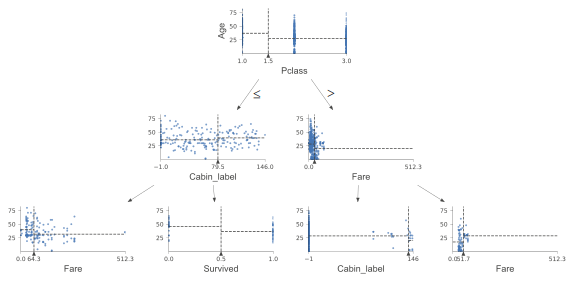

In [33]:
viz_rmodel.view(depth_range_to_display=(0, 2))

## Prediction path explanations

In [36]:
x = dataset[features_reg].iloc[10]
x

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

### Path inside tree structure

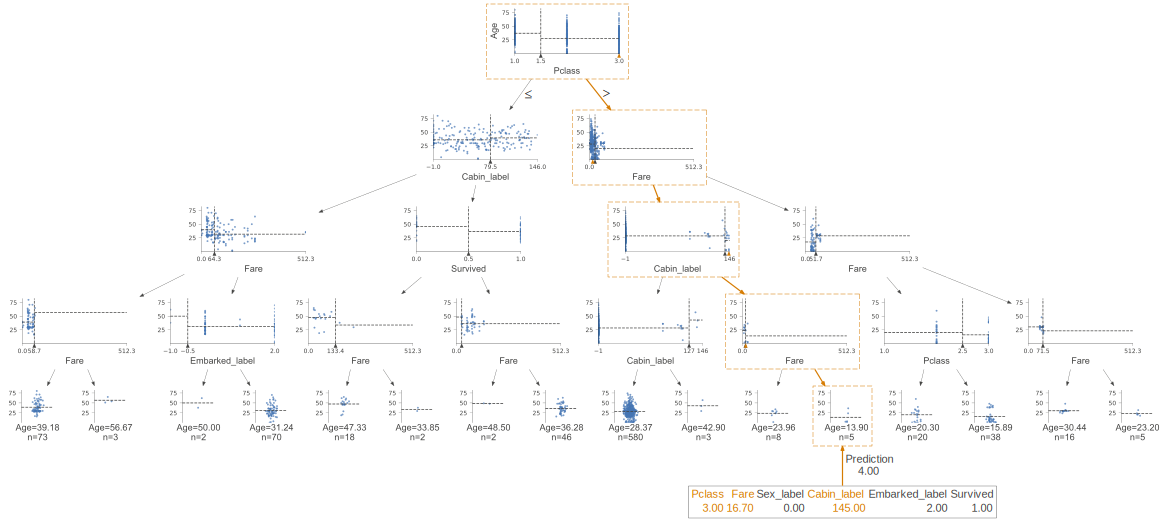

In [38]:
viz_rmodel.view(x = x)

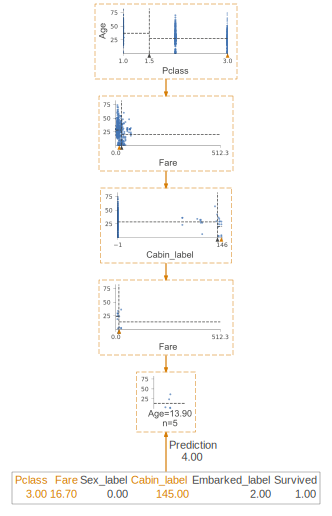

In [39]:
viz_rmodel.view(show_just_path=True, x = x)

### Prediction features range values

In [40]:
print(viz_rmodel.explain_prediction_path(x))

1.5 <= Pclass 
14.85 <= Fare  < 27.82
139.5 <= Cabin_label 



### Prediction feature importance

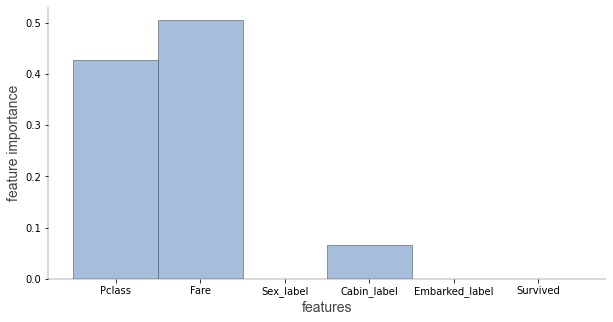

In [43]:
viz_rmodel.instance_feature_importance(x)

## Leaf info

### Leaf sizes

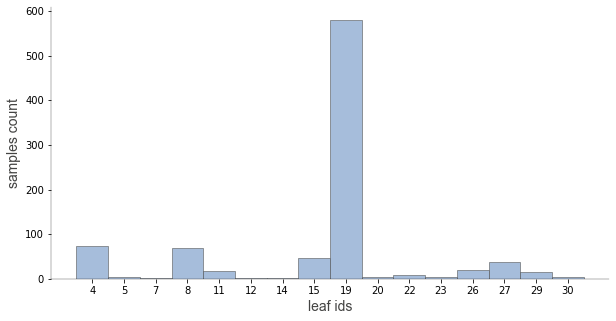

In [44]:
viz_rmodel.leaf_sizes()

### Leaf distributions

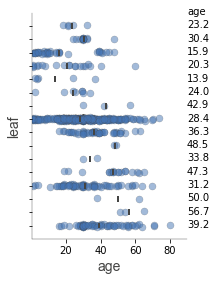

In [45]:
viz_rmodel.rtree_leaf_distributions()

### Leaf/node stats

In [46]:
viz_rmodel.node_stats(node_id=19)

Pclass        Fare   Sex_label  Cabin_label  Embarked_label  \
count  580.000000  580.000000  580.000000   580.000000      580.000000   
mean     2.741379   11.869690    0.691379     0.879310        1.622414   
std      0.438255    6.077116    0.462323    14.286941        0.703198   
min      2.000000    0.000000    0.000000    -1.000000        0.000000   
25%      2.000000    7.775000    0.000000    -1.000000        2.000000   
50%      3.000000    8.662500    1.000000    -1.000000        2.000000   
75%      3.000000   14.500000    1.000000    -1.000000        2.000000   
max      3.000000   27.750000    1.000000   118.000000        2.000000   

         Survived  
count  580.000000  
mean     0.300000  
std      0.458653  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

### Leaf purities

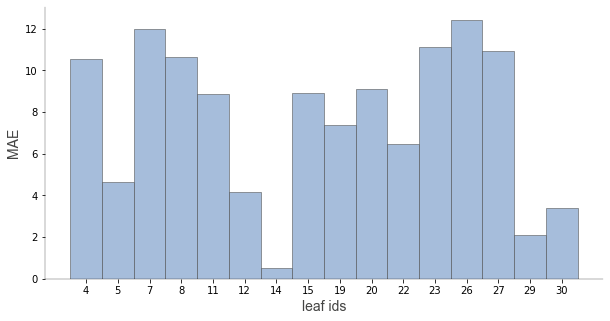

In [47]:
viz_rmodel.leaf_purity()

### rtreeviz_univar

In [48]:
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees

In [49]:
features_reg_univar = ["Pclass"]
target_reg = "Age"
dtr_univar = DecisionTreeRegressor(max_depth=2, random_state=random_state, criterion="absolute_error")
dtr_univar.fit(dataset[features_reg_univar], dataset[target_reg])


DecisionTreeRegressor(criterion='absolute_error', max_depth=2,
                      random_state=1234)

In [50]:
skdtree_univar = ShadowSKDTree(dtr_univar, dataset[features_reg_univar], dataset[target_reg], features_reg_univar, target_reg)


/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


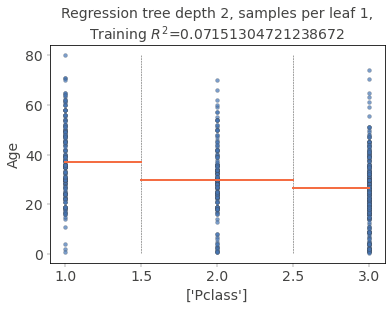

In [51]:
trees.rtreeviz_univar(skdtree_univar)

### rtreeviz_bivar_3D

In [52]:
features_reg_bivar = ["Age", "Fare"]
target_reg = "Pclass"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="absolute_error")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      random_state=1234)

In [53]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


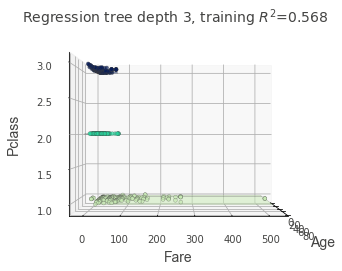

In [54]:
trees.rtreeviz_bivar_3D(skdtree_bivar)

### rtreeviz_bivar_heatmap

In [55]:
features_reg_bivar = ["Pclass", "Fare"]
target_reg = "Age"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="absolute_error")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      random_state=1234)

In [56]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


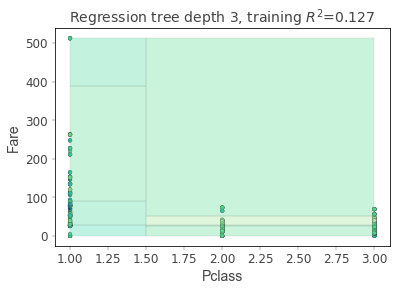

In [57]:
trees.rtreeviz_bivar_heatmap(skdtree_bivar)